<a href="https://colab.research.google.com/github/DrDavidL/learning-dhds/blob/main/Part_4_More_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 4: A bit deeper into ML

- Author: David Liebovitz, MD
- Updated by Jay Manadan
- For Northwestern University Feinberg School of Medicine  
- May use with attribution

[Part 1](https://drive.google.com/file/d/1N9U5NybETiu6JdUBoiFvuLiZZ6UuG0Nx/view?usp=sharing), [Part 2](https://drive.google.com/file/d/1JGePTrMJfnjH4WWpu_F77Oy_rLRR2pCW/view?usp=sharing), [Part 3](https://drive.google.com/file/d/1UrGbYapImkuFA4RTp1rYC1zLCaCgaAxQ/view?usp=sharing),
[Part 4](https://drive.google.com/file/d/1h7NnkPIihE_JuztP7uEcEK3T5JMcDHk4/view?usp=sharing), [Part 5](https://drive.google.com/file/d/1qxjFy2fPc72tkyJxupQ6EruvFR94txaf/view?usp=sharing), [Part 6](https://drive.google.com/file/d/1bzYpdEFhFlr1_uqMIwNKesJ7XAWRSB5O/view?usp=sharing)

# Getting libraries and data ready!

Run the first code cell to check if our cloud computer has a GPU. If not, we'll use the regular CPU. This step also sets up the software we need.










In [ ]:
# === Step 1: Check GPU Availability and Set Index URL ===
import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"✅ GPU Detected: {gpu_name} | CUDA {torch.version.cuda}")
    TORCH_INDEX_URL = "https://download.pytorch.org/whl/cu124"
else:
    print("⚠️ No GPU detected. Installing CPU-only versions.")
    TORCH_INDEX_URL = "https://download.pytorch.org/whl/cpu"

# === Step 2: Install Required Packages ===
!pip install -q --no-cache-dir mljar-scikit-plot imbalanced-learn shap \
    xgboost torch torchvision torchaudio timm opencv-python matplotlib torchxrayvision \
    --extra-index-url $TORCH_INDEX_URL

# === Step 3: Import Libraries ===
# -- Essential Data Science Libraries --
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as ply  # For interactive plotting
import ipywidgets as widgets

# -- PyTorch and Image Processing --
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms as transforms
import torchvision
import cv2
import torchxrayvision as xrv
from skimage import io

# -- Scikit-learn: Model Training, Preprocessing, and Evaluation --
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics, svm
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc, log_loss,
                             recall_score, precision_score, average_precision_score, classification_report,
                             accuracy_score, RocCurveDisplay, PrecisionRecallDisplay, confusion_matrix, ConfusionMatrixDisplay)

# -- Visualization of Model Metrics --
import scikitplot as skplt
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# -- XGBoost and SHAP --
import xgboost as xgb
from xgboost import XGBClassifier
import shap

# -- Handling Imbalanced Data --
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# -- Google Colab-Specific Settings --
try:
    from google.colab import data_table
    data_table.enable_dataframe_formatter()
except ImportError:
    print("Not in Google Colab, skipping interactive data table formatting.")

# -- tqdm Fix for Notebooks --
import tqdm
tqdm.tqdm = tqdm.notebook.tqdm

# -- Plotly Notebook Initialization --
import plotly.offline
plotly.offline.init_notebook_mode(connected=True)

# === Step 4: Configure Display and Plot Settings ===
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
sns.set(rc={'figure.figsize': (12, 6)})

print("✅ Setup Complete. Ready to analyze data!")


✅ GPU Detected: Tesla T4 | CUDA 12.4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 178.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 147.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 149.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 234.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 193.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 205.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 143.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 216.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 267.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 224.8 MB/s eta 0:00:00


✅ Setup Complete. Ready to analyze data!



# Data import

As in prior notebooks, this notebook utilizes a dataset sourced from University of Virginia studies by Dr. Robert Schorling of several hundred rural African American patients. Additional information on this data set is available here:   
> https://hbiostat.org/data/repo/diabetes.html   

Using this data source, [Dr. Robert Hoyt](https://data.world/rhoyt) assigned patients to a diabetes category if their hemoglobin A1c values were [6.5 or greater](https://data.world/informatics-edu/diabetes-prediction). The dataset  explored here is the modified version from Dr. Hoyt, almost ready to go for our explorations.

Our next step: Let's retrieve the data to use in our Notebook!



In [ ]:
# Run this cell to reference the website that is holding the diabetes data in a CSV (comma separated values) file!
website = "https://drive.google.com/uc?export=download&id=1PQM8eQnQpaJwe9mAVb_XBpZoWoA5nTlM"

# polyp example
website_no = 'https://raw.githubusercontent.com/DrDavidL/dhds/main/colon_path_pred.csv'

# The command below assigns the name dm_raw to the now read CSV file retrieved from the website!
df = pd.read_csv(website)

# Let's view 10 rows of data and enable sorting for the columns. Click column headers to get a feel for the max/min for columns.
# What's the maximum SBP? Lowest HDL? Note the Filter option at the top right. Click and filter to see how many patients are over 85.
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,194,86,67,2.9,35,male,66,159,25.7,115,64,31,35,0.89,No diabetes
1,158,74,64,2.5,30,female,62,142,26.0,108,68,32,34,0.94,No diabetes
2,203,71,78,2.6,45,male,66,115,18.6,135,88,30,34,0.88,No diabetes
3,160,82,41,3.9,30,female,63,143,25.3,172,124,33,40,0.83,No diabetes
4,155,81,70,2.2,32,female,65,151,25.1,120,68,33,40,0.83,No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,237,233,58,4.1,49,female,62,189,34.6,130,90,43,47,0.91,Diabetes
386,443,185,23,19.3,51,female,70,235,33.7,158,98,43,48,0.90,Diabetes
387,203,90,51,4.0,60,female,59,123,24.8,130,72,36,41,0.88,Diabetes
388,265,330,34,7.8,61,male,74,191,24.5,170,88,39,41,0.95,Diabetes


In [ ]:
# Encode 'Gender' and 'Diabetes' columns
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df['Diabetes'] = df['Diabetes'].map({'Diabetes': 1, 'No diabetes': 0})

# Calculate the correlation matrix
corr_df = df.corr()

# Sort correlations with 'Diabetes' column in descending order and round to 3 decimal places
diabetes_corr = corr_df['Diabetes'].round(3).sort_values(ascending=False)

# Print correlations with presence of diabetes for each variable
print(diabetes_corr)


Diabetes           1.000
Glucose            0.689
Age                0.302
Chol/HDL ratio     0.273
waist              0.223
Cholesterol        0.204
Systolic BP        0.199
Waist/hip ratio    0.176
Weight             0.163
BMI                0.145
hip                0.144
Diastolic BP       0.049
Height             0.023
Gender             0.016
HDL Chol          -0.123
Name: Diabetes, dtype: float64


We'll change the text labels like "male" or "Diabetes" into numbers so our computer can work with them.
Then, we calculate how strongly each variable is connected to having diabetes. For example, glucose and age are expected to have strong relationships. But others might have more complex patterns that aren't as obvious. That's where machine learning can help!



# **XGBoost to the Rescue!**

**Why Use XGBoost for Predicting Diabetes?**



XGBoost is a powerful ML algorithm that works great for health data stored in tables. Here’s why:

- Handles Tables Well: Perfect for data like blood pressure, cholesterol, etc.

- Deals with Missing Values: You don’t need to fill in missing spots manually.

- Improves Itself: Learns from mistakes in each round to get better predictions.

- Avoids Overfitting: Uses smart rules to not memorize the data.

- Fast and Efficient: Works well even with big datasets.

- Handles Unbalanced Data: Good at spotting rare conditions (like diabetes).

- Explains Itself: Shows which features (like glucose) are most important.



## Hyperparameters

Before using a machine learning algorithm, there are some important settings, e.g., if it iterates over data, how much data should it use at a time? How many features for each pass of the data should be included? How much should the model evolve if a wrong answer is predicted? These configuration settings are inserted into algorithms together with the data to generate a predictive model. For our first pass, we'll use what are regarded as reasonable starting settings. Then, we'll apply a method to pick the best hyperparameters and see if it does better!

In [ ]:
# Define starting XGBoost hyperparameters: Configuration settings before starting!
xgb_params = {
    'objective': 'binary:logistic',  # For our case, specify binary classification, i.e., diabetes or not diabetes.
    'eval_metric': 'auc',  # Evaluation metric we'll use to assess the model performance
    'learning_rate': 0.1,  # Step size for each iteration - how much to learn with each step
    'max_depth': 6,  # Maximum tree depth (branches)
    'n_estimators': 100,  # Number of boosting rounds (trees)
    'subsample': 0.8,  # Randomly sample 80% of dataset for each tree
    'colsample_bytree': 0.8,  # Randomly sample 80% of features for each tree
    'lambda': 1,  # L2 regularization: Reduces overfitting while still allowing all features to contribute.
    'alpha': 0.5,  # L1 regularization: Encourages sparsity by driving some coefficients to exactly zero, effectively performing feature selection.
    'random_state': 42  # For reproducibility: To obtain similar results when processing the data again
}


**Step-by-Step Plan to Use XGBoost**

1. Convert our text labels into numbers.

2. Separate our target column ("Diabetes") from the rest.

3. Set up XGBoost with some starting settings (called hyperparameters).

4. Train the model on part of the data and test it on the rest.

5. Check how well it did.

6. Show which features mattered most.

7. Look at what the model got right and wrong (confusion matrix).

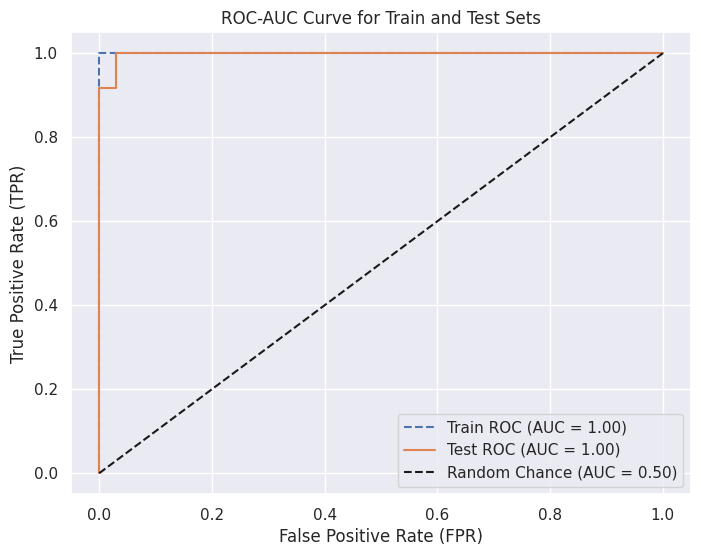

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.83      0.91        12

    accuracy                           0.97        78
   macro avg       0.99      0.92      0.95        78
weighted avg       0.98      0.97      0.97        78

Test ROC-AUC: 1.00


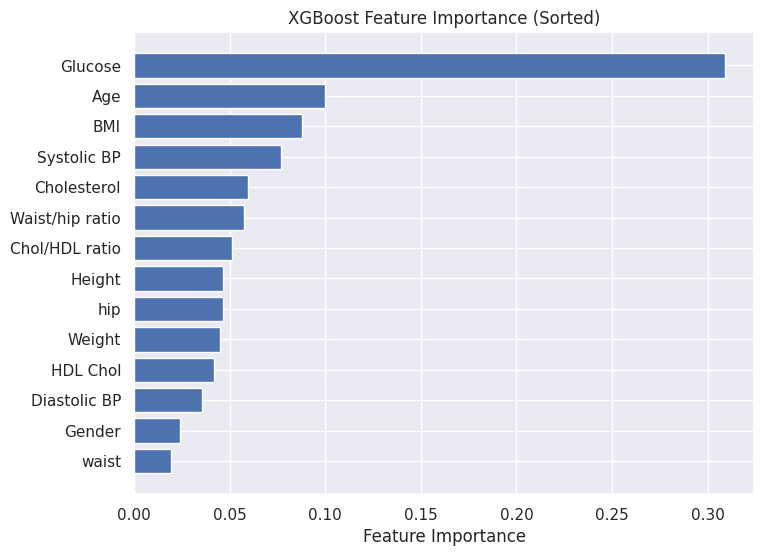

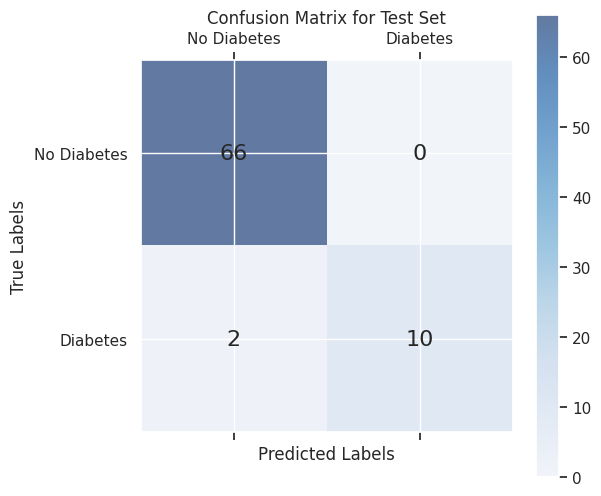

array([[66,  0],
       [ 2, 10]])

In [ ]:


# Encode categorical variables (e.g., Gender, Diabetes)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Diabetes'] = le.fit_transform(df['Diabetes'])

# Define features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize XGBoost model with specified hyperparameters
xgb_model = XGBClassifier(**xgb_params)

# Train the model using the train set
xgb_model.fit(X_train, y_train)

# Train predictions and AUC score
y_train_pred_proba = xgb_model.predict_proba(X_train)[:, 1]  # Probability for class 1
train_auc = roc_auc_score(y_train, y_train_pred_proba)

# Test predictions and AUC score
y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability for class 1
test_auc = roc_auc_score(y_test, y_test_pred_proba)

# Generate ROC curves for train and test datasets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

# Plot ROC curves for train and test datasets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_auc:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve for Train and Test Sets')
plt.legend(loc='lower right')
plt.show()

# Predict labels for the test set
y_pred = xgb_model.predict(X_test)

# Print classification report for the test set
print(classification_report(y_test, y_pred))

# Print ROC-AUC score for the test set
print(f"Test ROC-AUC: {test_auc:.2f}")

# Extract feature importance values
feature_importance = xgb_model.feature_importances_
features = X.columns

# Create a DataFrame to sort the features by importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Visualize Feature Importance (Sorted)
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Sorted)")
plt.show()

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.6)
plt.colorbar(cax)

for (i, j), value in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{value}', ha='center', va='center', fontsize=16)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Test Set')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.show()

# Returning the confusion matrix for reference
conf_matrix

Be sure to scroll the full lengthy output above. Hard to get a better ROC! But, if you look at the confusion matrix, we likely missed a couple cases of diabetes. Let's see if we can tune our hyperparameters and do even better! Instead of guessing the best settings, we’ll try out many combinations and let the computer pick the best ones using something called Random Search. This may take 30 seconds or so.

In [ ]:


# Define hyperparameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Control convergence speed
    'max_depth': [3, 6, 9],  # Complexity of each tree
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'subsample': [0.6, 0.8, 1.0],  # Data sampling ratio per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Feature sampling ratio per tree
    'lambda': [0.5, 1, 1.5],  # L2 regularization
    'alpha': [0, 0.5, 1]  # L1 regularization
}

# Set up Random Search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings to sample
    scoring='roc_auc',  # AUC score as the metric
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Perform the random search
random_search.fit(X_train, y_train)

# Retrieve the best model from random search
best_model = random_search.best_estimator_

print(f"Best Parameters: {random_search.best_params_}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.01, 'lambda': 1.5, 'colsample_bytree': 0.6, 'alpha': 1}


**Choosing the Best Cut-Off for Predictions**
Once we have our best model, we need to decide what probability value to use to say "Yes, this person likely has diabetes." We'll use a method called Youden's J statistic to find the best threshold.

Then we:

- Show the updated performance.

- Look again at which features were most important.

- Show the updated confusion matrix.

Optimal Cut-off Threshold (Youden's J from Training Set): 0.176


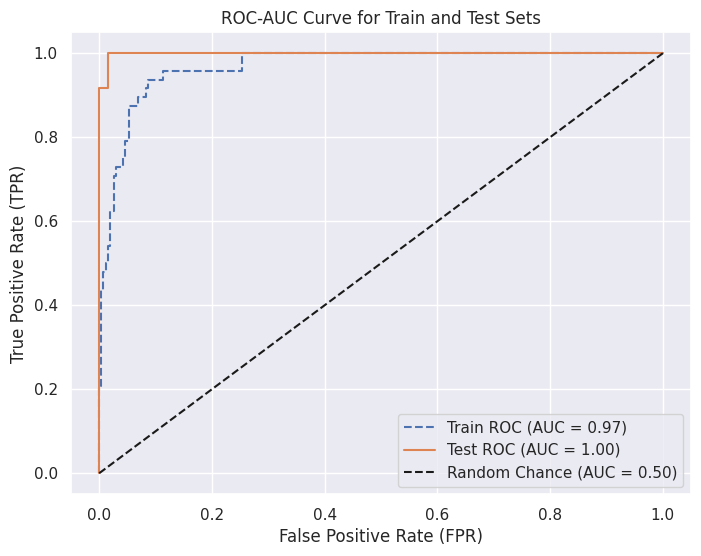

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.92      1.00      0.96        12

    accuracy                           0.99        78
   macro avg       0.96      0.99      0.98        78
weighted avg       0.99      0.99      0.99        78

Test ROC-AUC: 1.00


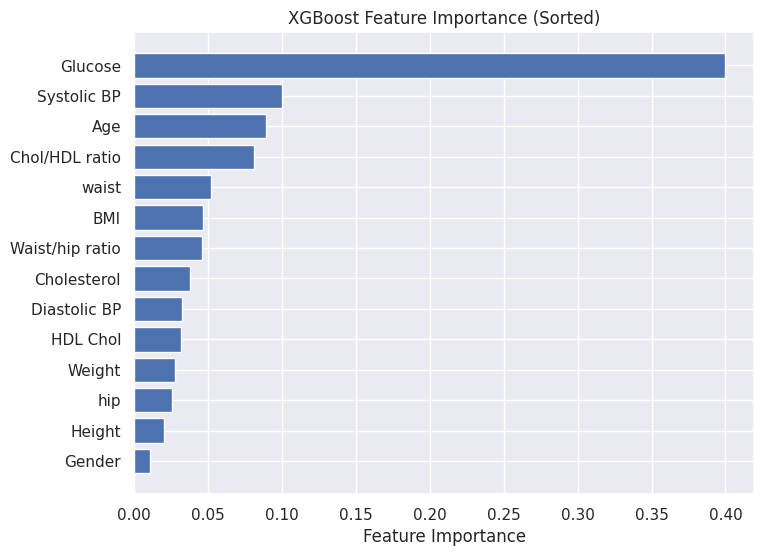

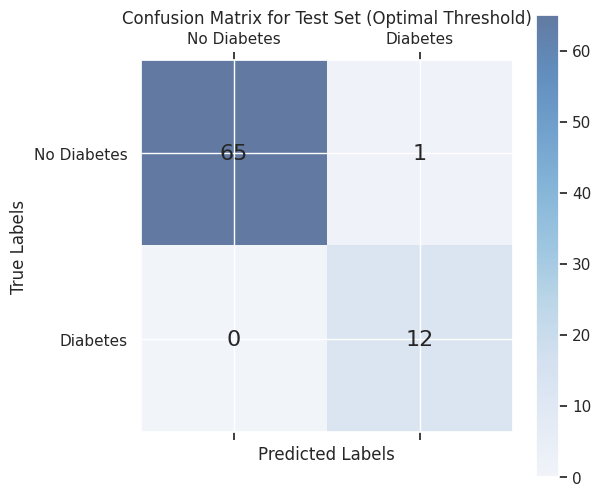

array([[65,  1],
       [ 0, 12]])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use the best model to make probability predictions
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute AUC scores
train_auc = roc_auc_score(y_train, y_train_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

# Generate ROC curves for train and test datasets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)

# Compute Youden's J statistic on the TRAINING set
J_scores_train = tpr_train - fpr_train
best_threshold_index_train = J_scores_train.argmax()
best_threshold_train = thresholds_train[best_threshold_index_train]

print(f"Optimal Cut-off Threshold (Youden's J from Training Set): {best_threshold_train:.3f}")


# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_auc:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve for Train and Test Sets')
plt.legend(loc='lower right')
plt.show()

# Predict labels using the optimal threshold
y_pred_optimal = (y_test_pred_proba >= best_threshold_train).astype(int)

# Print classification report using the optimal threshold
print("Classification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

# Print ROC-AUC score for the test set
print(f"Test ROC-AUC: {test_auc:.2f}")

# Extract feature importance values
feature_importance = best_model.feature_importances_
features = X.columns

# Create a DataFrame to sort the features by importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Visualize Feature Importance (Sorted)
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Sorted)")
plt.show()

# Generate Confusion Matrix using the optimal threshold
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.6)
plt.colorbar(cax)

for (i, j), value in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{value}', ha='center', va='center', fontsize=16)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Test Set (Optimal Threshold)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.show()

# Returning the confusion matrix for reference
conf_matrix


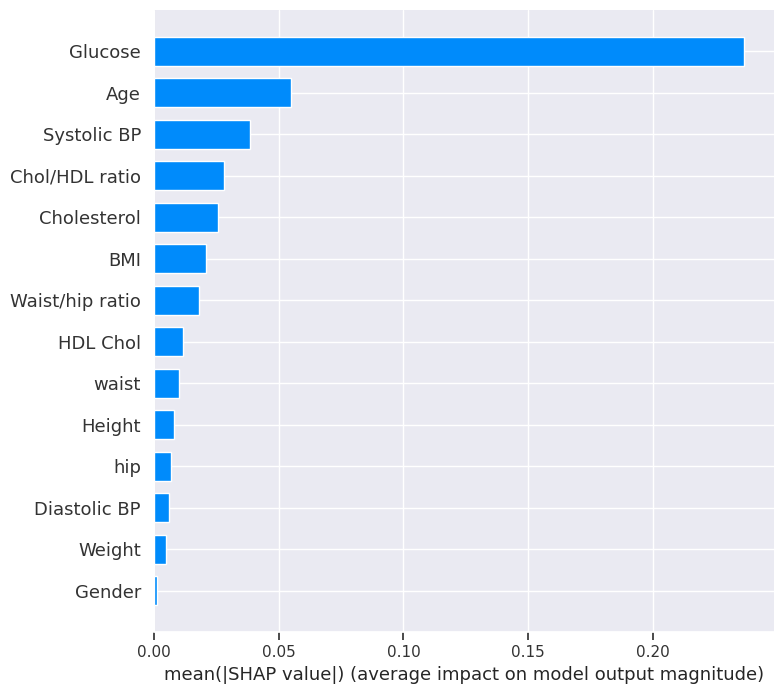

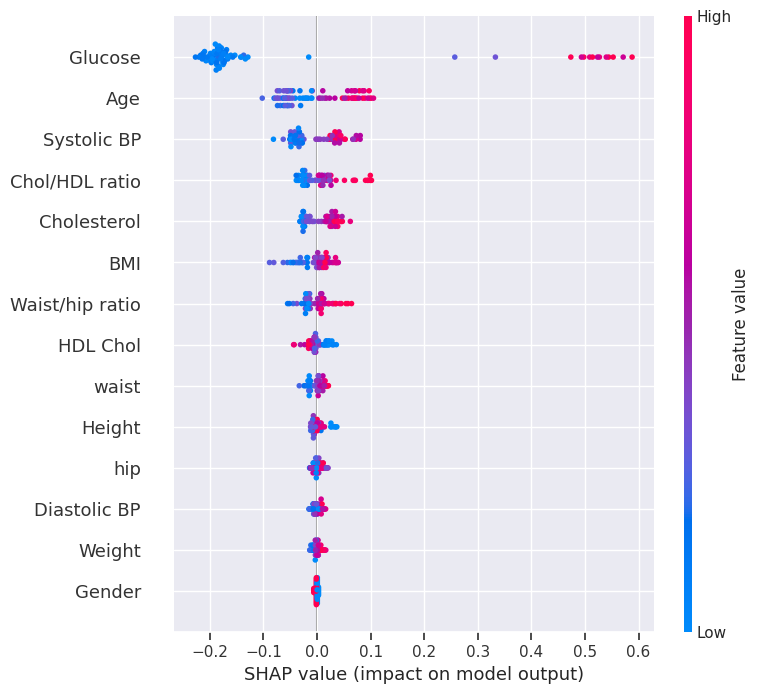

In [ ]:

# Initialize the SHAP Explainer
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot summary plot for feature importance (global interpretation)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Optional: Detailed summary plot for individual contributions
shap.summary_plot(shap_values, X_test)



**SHAP Values: Why Did the Model Say That?**

SHAP values explain individual predictions by showing how much each feature contributed. We show:

- A summary bar plot of most important features.

- A detailed view showing how each feature affected each patient's prediction.

## Imaging! If time - let's dive into images!

We'll now try to predict findings on a chest xray. We'll:

1. Retrieve a sample CXR.
2. Demonstrate how we could convert it to numbers and begin a prediction process.
3. Since creating a model can take lots of images and many minutes - we'll jump over and use a model Stanford created.
4. We'll see what that model thinks of our sample CXR!

Tensor Shape: torch.Size([1, 1, 224, 224])
Tensor Values:
 tensor([[[[0.6235, 0.4784, 0.4706,  ..., 0.3922, 0.3804, 0.5059],
          [0.3961, 0.1647, 0.1529,  ..., 0.0235, 0.0196, 0.1961],
          [0.3922, 0.1647, 0.1451,  ..., 0.0039, 0.0000, 0.1725],
          ...,
          [0.7176, 0.6275, 0.6392,  ..., 0.5020, 0.4824, 0.5725],
          [0.7216, 0.6275, 0.6392,  ..., 0.5020, 0.4745, 0.5765],
          [0.7922, 0.7137, 0.7255,  ..., 0.6196, 0.6000, 0.6784]]]])


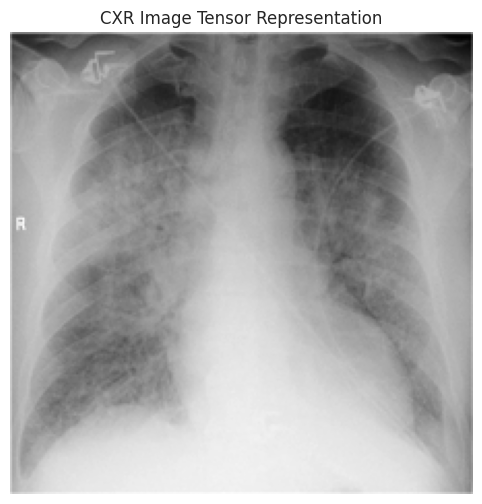

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import torch
import matplotlib.pyplot as plt


# Define the image URL
url = "https://radiologyassistant.nl/assets/chest-x-ray-heart-failure/a509797a678f8e_CHF-1c1.jpg"  # Example Chest X-ray URL

# Load the image from the URL
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale

# Resize to (224, 224) and convert to a NumPy array
image_resized = np.array(image.resize((224, 224)))

# Convert to PyTorch tensor and normalize to [0, 1]
image_tensor = torch.tensor(image_resized).float().unsqueeze(0).unsqueeze(0) / 255.0  # Shape: (1, 1, 224, 224)

# Display the Tensor Shape and Values
print("Tensor Shape:", image_tensor.shape)  # (1, 224, 224) for grayscale
print("Tensor Values:\n", image_tensor)

# Visualize the Image and Verify the Tensor Representation
plt.imshow(image_tensor.squeeze(), cmap='gray')
plt.title('CXR Image Tensor Representation')
plt.axis('off')
plt.show()

Above you see the CXR and on top its corresponding "tensor" representation. The tensor includes the sorted values for each pixel. We reduced the CXR size to 224x224 pixels. You can still see it looks OK, albeit lower resolution. Then, each of the 224x224 = 50,176 pixels is then listed sequentially in the tensor. The value is the grayscale color of that pixel! Now you see how we are directly representing that image using numbers! We are ready to analyze!

# Making a CNN (Convolutional Neural Network)

This is a bit beyond the scope (and processing power available for free), but we'll illustrate here how one (say of hundreds of sample CXRs) could be processed by one layer of a CNN. This will show multiple different ways to look at this CXR. Imagine a model trained on many CXRs with different filters highlighting different aspects and then mapping those features into a model to predict diagnoses. This is a glimpse into this process. Then, we'll cut to the chase (given our processing constraints), and apply a ready-to-go model to our CXR example for a prediction.

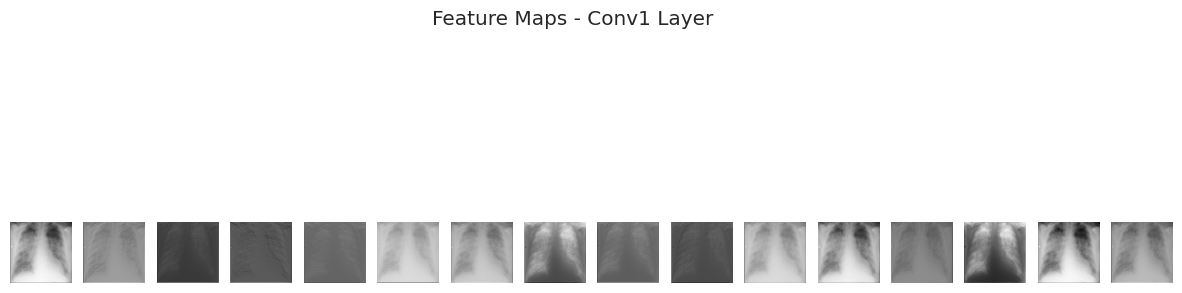

In [ ]:

class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.fc1 = torch.nn.Linear(16 * 112 * 112, 2)

    def forward(self, x):
        conv1_out = self.conv1(x)
        pooled_out = self.pool(torch.nn.functional.relu(conv1_out))
        flattened = pooled_out.view(-1, 16 * 112 * 112)
        output = self.fc1(flattened)
        return conv1_out, pooled_out, output

# Initialize the model
simple_cnn = SimpleCNN()

# Get intermediate layer outputs
conv1_out, pooled_out, output = simple_cnn(image_tensor)

# print("Model Output:", output)

def plot_feature_maps(feature_map, title):
    """Plot the feature maps from a layer."""
    num_filters = feature_map.shape[1]
    fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))

    for i in range(num_filters):
        axes[i].imshow(feature_map[0, i].detach().numpy(), cmap='gray')
        axes[i].axis('off')

    plt.suptitle(title)
    plt.show()

# Plot feature maps from the first convolutional layer
plot_feature_maps(conv1_out, "Feature Maps - Conv1 Layer")


Above you can see one level of how a CXR would be processed in a CNN to feed a model for analysis to predict a diagnosis.

Now, let's tee up the TorchXRayVision model!

In [ ]:

# Prepare the image from URL!
url = "https://radiologyassistant.nl/assets/chest-x-ray-heart-failure/a509797a678f8e_CHF-1c1.jpg"  # Replace with actual image URL
response = requests.get(url)
img = io.imread(BytesIO(response.content))

# Normalize the image to the expected range [-1024, 1024]
img = xrv.datasets.normalize(img, 255)
img = img.mean(2)[None, ...]  # Make single color channel

# Set XRayResizer to use OpenCV (cv2) engine for better performance
transform = torchvision.transforms.Compose([
    xrv.datasets.XRayCenterCrop(),
    xrv.datasets.XRayResizer(224, engine="cv2")  # Use cv2 engine for faster resizing
])

# Apply the transformations
img = transform(img)
img = torch.from_numpy(img).float()

# Load the DenseNet model with pre-trained weights
model = xrv.models. (weights="densenet121-res224-all")

# Process the image with the model
outputs = model(img[None, ...])

# Convert results into a dictionary and sort by probability (descending)
results = dict(zip(model.pathologies, outputs[0].detach().numpy()))
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Display the sorted results
print("Predicted Pathologies (Sorted by Probability):")
for pathology, probability in sorted_results:
    print(f"{pathology}: {probability:.4f}")


If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt -O /root/.torchxrayvision/models_data/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt`
[██████████████████████████████████████████████████]
Predicted Pathologies (Sorted by Probability):
Lung Opacity: 0.9883
Pneumonia: 0.9776
Infiltration: 0.8550
Mass: 0.7496
Consolidation: 0.7298
Effusion: 0.6522
Enlarged Cardiomediastinum: 0.6511
Nodule: 0.5886
Edema: 0.5841
Atelectasis: 0.5196
Fibrosis: 0.5171
Emphysema: 0.5031
Pneumothorax: 0.5024
Pleural_Thickening: 0.5011
Cardiomegaly: 0.2814
Lung Lesion: 0.0683
Fracture: 0.0591
Hernia: 0.0001


Not perfect - but can run on a midling CPU! Ensemble models (combining many algorithms) perform better!

Hope you now have a bit of a better idea about applied ML and AI approaches!

